<a href="https://colab.research.google.com/github/TANGTHEMANH/phan_tich_du_lieu/blob/master/Visualizing(chipote).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

In [16]:
chipo = pd.read_csv('/content/sample_data/chipotle.tsv.txt',delimiter='\t')

In [6]:
print(chipo)

      order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN     $2.39   
1                                          [Clementine]  

In [7]:
# Step 4. See the first 10 entries
print(chipo.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

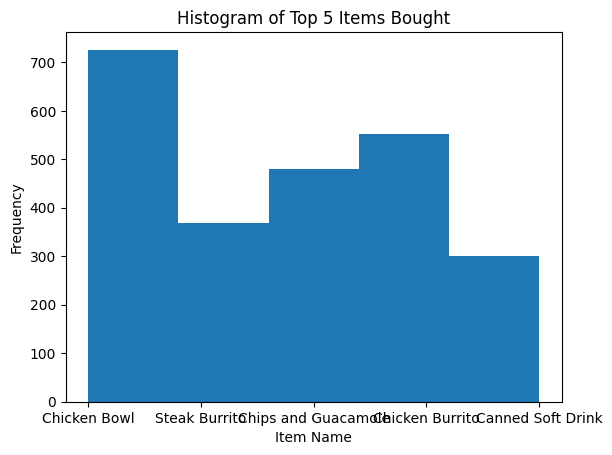

In [9]:
# Step 5. Create a histogram of the top 5 items bought
# group the DataFrame by item_name and sum the quantity column
grouped = chipo.groupby('item_name')['quantity'].sum()

# sort the grouped Series in descending order and select the top 5 items
top_items = grouped.sort_values(ascending=False)[:5]

# create a histogram of the top 5 items
fig, ax = plt.subplots()
ax.hist(chipo[chipo['item_name'].isin(top_items.index)]['item_name'], bins=5)
ax.set_xlabel('Item Name')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Top 5 Items Bought')

# save the plot to disk
plt.savefig('top5_items_bought.png')

plt.show()

<ipython-input-17-8e71ed32a8be>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype('float')


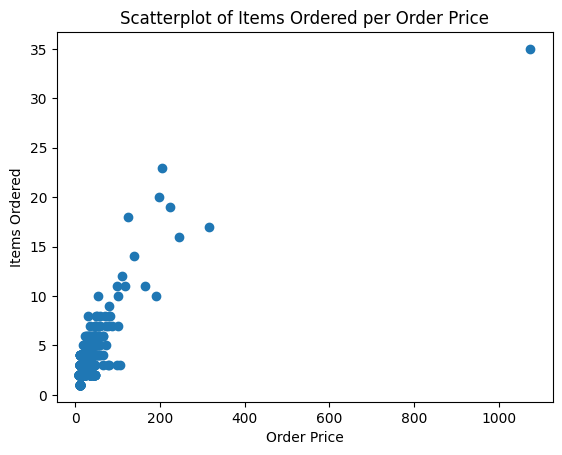

In [17]:
# Step 6. Create a scatterplot with the number of items orderered per order price
# convert the item_price column to a float
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype('float')

# calculate the total price per order
chipo['total_price'] = chipo['quantity'] * chipo['item_price']

# group the DataFrame by order_id and sum the total_price and quantity columns
grouped = chipo.groupby('order_id').agg({'total_price': 'sum', 'quantity': 'sum'})

# create a scatterplot with the number of items ordered per order price
fig, ax = plt.subplots()
ax.scatter(grouped['total_price'], grouped['quantity'])
ax.set_xlabel('Order Price')
ax.set_ylabel('Items Ordered')
ax.set_title('Scatterplot of Items Ordered per Order Price')



plt.show()